##1. Import the necessary packages to read in the data, plot, and create a linear regression model

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # package for doing plotting (necessary for adding the line)
import statsmodels.formula.api as smf

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/mercybenzaquen/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


## 2. Read in the hanford.csv file 

In [2]:
df = pd.read_csv("hanford.csv")

<img src="images/hanford_variables.png">

## 3. Calculate the basic descriptive statistics on the data

In [3]:
df.mean()

Exposure       4.617778
Mortality    157.344444
dtype: float64

In [4]:
df.median()

Exposure       3.41
Mortality    147.10
dtype: float64

In [5]:
iqr = df.quantile(q=0.75)- df.quantile(q=0.25)
iqr

Exposure      3.92
Mortality    47.80
dtype: float64

In [6]:
UAL= (iqr*1.5) + df.quantile(q=0.75)
UAL

Exposure      12.29
Mortality    249.60
dtype: float64

In [8]:
LAL= df.quantile(q=0.25) - (iqr*1.5)  
LAL

Exposure     -3.39
Mortality    58.40
dtype: float64

## 4. Calculate the coefficient of correlation (r) and generate the scatter plot. Does there seem to be a correlation worthy of investigation?

In [9]:
df.corr()

,Exposure,Mortality
Exposure,1.000000,0.926345
Mortality,0.926345,1.000000


In [10]:
df

,County,Exposure,Mortality
0,Umatilla,2.49,147.1
1,Morrow,2.57,130.1
2,Gilliam,3.41,129.9
3,Sherman,1.25,113.5
4,Wasco,1.62,137.5
5,HoodRiver,3.83,162.3
6,Portland,11.64,207.5
7,Columbia,6.41,177.9
8,Clatsop,8.34,210.3


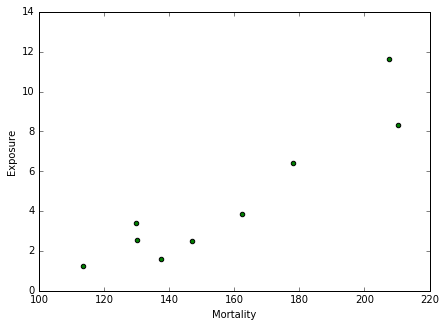

In [16]:
#fig, ax = plt.subplots()
ax= df.plot(kind='scatter', y='Exposure', x='Mortality', color='green', figsize= (7,5))
ax

## 5. Create a linear regression model based on the available data to predict the mortality rate given a level of exposure

In [17]:
lm = smf.ols(formula="Mortality ~ Exposure",data=df).fit()

In [20]:
lm.params

Intercept    114.715631
Exposure       9.231456
dtype: float64

In [21]:
def mortality_rate_calculator(exposure): 
    return (114.715631 + (9.231456 * float(exposure)))

In [23]:
df['predicted_mortality_rate'] = df['Exposure'].apply(mortality_rate_calculator)
df

,County,Exposure,Mortality,predicted_mortality_rate
0,Umatilla,2.49,147.1,137.701956
1,Morrow,2.57,130.1,138.440473
2,Gilliam,3.41,129.9,146.194896
3,Sherman,1.25,113.5,126.254951
4,Wasco,1.62,137.5,129.670590
5,HoodRiver,3.83,162.3,150.072107
6,Portland,11.64,207.5,222.169779
7,Columbia,6.41,177.9,173.889264
8,Clatsop,8.34,210.3,191.705974


## 6. Plot the linear regression line on the scatter plot of values. Calculate the r^2 (coefficient of determination)

In [26]:
intercept, slope = lm.params

In [ ]:
#DONT KNOW WHAT HAPPENED HERE :S

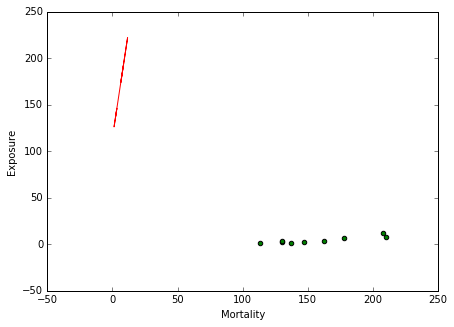

In [31]:
df.plot(kind='scatter', y='Exposure', x='Mortality', color='green', figsize= (7,5))

plt.plot(df["Exposure"],slope *df["Exposure"]+ intercept,"-",color="red")

## 7. Predict the mortality rate (Cancer per 100,000 man years) given an index of exposure = 10